# YouTube Data API v3

### Python Libraries

In [1]:
import requests
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx

import collections

### Imported Scripts

In [ ]:
    # api_key is stored in config.py
import config

    # Functions for making youtube_requests
import youtube_requests

    # Functions for data processing
import data_processing

    # Functions for creating a network graph    
import network_graphs

import importlib
#importlib.reload(network_graphs)

In [3]:
%load_ext autoreload

In [4]:
%autoreload 1

In [5]:
%aimport network_graphs
%aimport youtube_requests

# YouTube Channel Details by Search

Returns a details list of channels for a specific search query and number of requested results.

In [288]:
# Get a list of dictionaries, where each dictionary represents details for a specific channel
CHANNELS_DETAILS_ITEMS_LIST = youtube_requests.youtube_channel_details_by_search('corridor crew',10)

# Graph the network of channels
#G= network_graphs.create_nx_graph(CHANNELS_DETAILS_ITEMS_LIST, directed=True)

# Extract a columnar list of channel details
#CHANNELS_DETAILS_LIST = data_processing.extract_channel_details(CHANNELS_DETAILS_ITEMS_LIST)

# Create a dataframe
#DF = data_processing.create_df_from_details_list(CHANNELS_DETAILS_LIST)

# Graph G
#fig = network_graphs.graph_nx_graph(G)
#plt.close()

Already seen this query


# Youtube Channel Details by Network

-------

In [308]:
TEMP = [channel['id'] for channel in CORRIDOR_FIVE]

In [ ]:
youtube_requests.youtube_channel_details_by_network(a, 1)

In [ ]:
CORRIDOR_FIVE

Havent seen this list, request and cache
10 total neighbors; 0 out of 1 channels do not feature channels


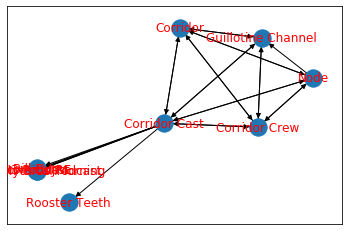

In [313]:
# Get a list of dictionaries, where each dictionary represents details for a specific channel
CHANNELS_DETAILS_ITEMS_LIST = youtube_requests.youtube_channel_details_by_network([TEMP[1]], 1)

# Graph the network of channels
G = network_graphs.create_nx_graph(CHANNELS_DETAILS_ITEMS_LIST, True)

# Extract a columnar list of channel details
CHANNELS_DETAILS_LIST = data_processing.extract_channel_details(CHANNELS_DETAILS_ITEMS_LIST)

# Create a dataframe
DF = data_processing.create_df_from_details_list(CHANNELS_DETAILS_LIST)

# Graph G
network_graphs.graph_nx_graph(G)

In [223]:
fig = network_graphs.plotly_network_graph(G)

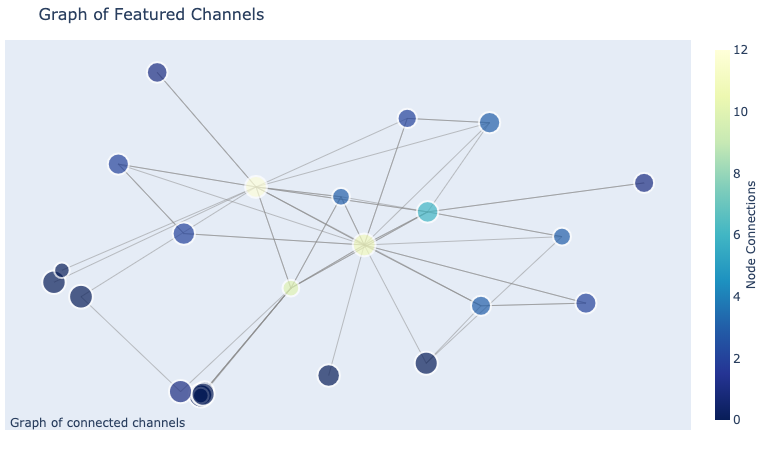

In [224]:
fig

## Page Rank, In-Degree centrality, betweeness centrality, and indegree value

In [30]:
page_rank_series = pd.Series(data = network_graphs.simple_page_rank(G), index = list(G.nodes().keys()))
DF['page_rank'] = DF['id'].map(lambda x:page_rank_series[x])

betweenness_dict = nx.betweenness_centrality(G)
DF['betweenness_centrality'] = DF['id'].map(lambda x:betweenness_dict[x])

in_degree_centrality_dict = nx.in_degree_centrality(G)
DF['in_degree_centrality'] = DF['id'].map(lambda x:in_degree_centrality_dict[x])

in_degree_dict = {node:G.in_degree()[node] for node in G.nodes()}
DF['in_degree'] = DF['id'].map(lambda x:in_degree_dict[x])

degree_dict = {node:G.degree()[node] for node in G.nodes()}
DF['degree'] = DF['id'].map(lambda x:degree_dict[x])

Sort channels by page rank

In [145]:
features = ['title','subscriberCount','viewCount','page_rank','featuredChannelsCount','degree','in_degree','betweenness_centrality','in_degree_centrality']

In [41]:
DF[['title','subscriberCount','viewCount','page_rank','featuredChannelsCount','degree','in_degree','betweenness_centrality','in_degree_centrality']].sort_values(
    'page_rank', ascending=False).head(8)

,title,subscriberCount,viewCount,page_rank,featuredChannelsCount,degree,in_degree,betweenness_centrality,in_degree_centrality
32,Carpool Critics,41200,400367,0.091585,6,11,5,0.000000,0.045455
17,Linus Tech Tips,11500000,3899734482,0.091585,6,13,7,0.020559,0.063636
29,ShortCircuit,936000,54203278,0.091585,6,11,5,0.000000,0.045455
36,TechLinked,1250000,181059678,0.091585,6,12,6,0.000042,0.054545
43,Techquickie,3520000,524324015,0.091585,6,12,6,0.000042,0.054545
54,LMG Clips,176000,19612357,0.091585,6,12,6,0.000042,0.054545
71,Channel Super Fun,739000,97590782,0.064253,4,10,6,0.000000,0.054545
2,Corridor Crew,4090000,706493568,0.047295,12,20,8,0.146542,0.072727


In [32]:
betweenness_dict = nx.betweenness_centrality(G)
in_degree_dict = nx.in_degree_centrality(G)
DF['betweenness_centrality'] = DF['id'].map(lambda x:betweenness_dict[x])
DF['in_degree_centrality'] = DF['id'].map(lambda x:in_degree_dict[x])

Sort channels by betweenness centrality.

In [42]:
DF[['title','subscriberCount','viewCount','page_rank','featuredChannelsCount','degree','in_degree','betweenness_centrality','in_degree_centrality']].sort_values(
    'betweenness_centrality', ascending=False).head(8)

,title,subscriberCount,viewCount,page_rank,featuredChannelsCount,degree,in_degree,betweenness_centrality,in_degree_centrality
1,Corridor,8060000,1463250152,0.033504,11,25,14,0.183506,0.127273
2,Corridor Crew,4090000,706493568,0.047295,12,20,8,0.146542,0.072727
0,Corridor Cast,110000,4990381,0.023768,10,14,4,0.100167,0.036364
10,Film Riot,1670000,191532908,0.016631,13,21,8,0.076642,0.072727
11,devinsupertramp,5920000,1436117980,0.010800,10,17,7,0.069323,0.063636
19,Shonduras,2440000,1628005096,0.011660,10,15,5,0.059808,0.045455
22,SoKrispyMedia,1130000,315561825,0.011749,10,17,7,0.055512,0.063636
23,Mike Diva,650000,142737115,0.009866,7,14,7,0.045655,0.063636


Sort channels by in_degree centrality.

In [43]:
DF[['title','subscriberCount','viewCount','page_rank','featuredChannelsCount','degree','in_degree','betweenness_centrality','in_degree_centrality']].sort_values(
    'in_degree_centrality', ascending=False).head(8)

,title,subscriberCount,viewCount,page_rank,featuredChannelsCount,degree,in_degree,betweenness_centrality,in_degree_centrality
1,Corridor,8060000,1463250152,3.350372e-02,11,25,14,0.183506,0.127273
90,LetsPlay,3850000,2431520849,6.639924e-17,1,10,9,0.000042,0.081818
2,Corridor Crew,4090000,706493568,4.729505e-02,12,20,8,0.146542,0.072727
16,Nukazooka,2250000,669129570,1.790866e-02,8,16,8,0.042045,0.072727
15,Rooster Teeth,9470000,6077158993,5.619542e-04,12,20,8,0.040979,0.072727
10,Film Riot,1670000,191532908,1.663137e-02,13,21,8,0.076642,0.072727
11,devinsupertramp,5920000,1436117980,1.079989e-02,10,17,7,0.069323,0.063636
28,Achievement Hunter,1640000,900009979,6.639924e-17,1,8,7,0.000000,0.063636


## Strongly Connected Components

In [35]:
scc_list = [scc for scc in nx.strongly_connected_components(G)]

In [ ]:
scc_list[42]

In [37]:
H = G.subgraph(list(scc_list[42]))

Plot of our subgraph of strongly connected components

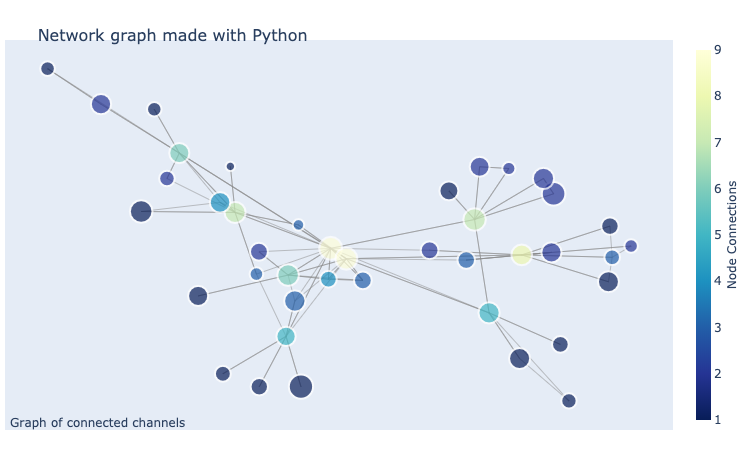

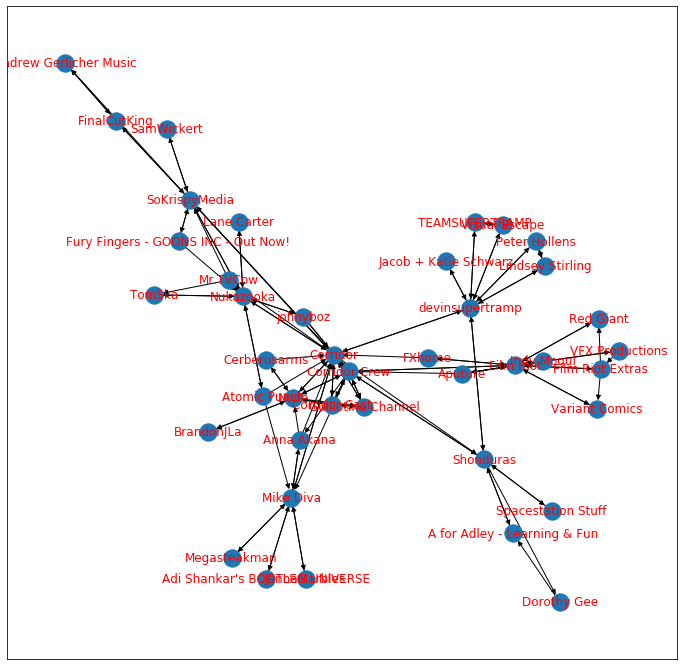

In [45]:
network_graphs.graph_nx_graph(H)
network_graphs.plotly_network_graph(H)

## Instantiate a cache for both queries and networks

### Queries

### Networks

In [314]:
with open('data/corridor_search.json','r') as json_file:
    CORRIDOR_SEARCH_10 = json.load(json_file)

In [317]:
QUERY_CACHE = {'corridor':CORRIDOR_SEARCH_10}

with open('data/query_cache.json','w') as fout:
    json.dump(QUERY_CACHE, fout)